In [10]:
from functions.Pre_processing_Casos_Graves import *
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split


import pmdarima as pm

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib as mpl

In [3]:
casos_graves = Pre_Processing_Casos_Graves()

In [4]:
casos_graves.run(columns_symptoms,columns_to_drop,columns_dieases,path)

c:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Codes\functions\Pre_processing_Casos_Graves.py:282: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column][i] = 1
c:\Users\gabri\Desktop\Git - Tcc\Estudo_dados_de_covid\Codes\functions\Pre_processing_Casos_Graves.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[column][i] = 1


In [5]:
df = casos_graves.df
df2 = casos_graves.df2
df3 = casos_graves.df3

In [6]:
df.columns

Index(['data_notificacao', 'sexo', 'idade', 'bairro', 'data_inicio_sintomas',
       'sintomas', 'outros_sintomas', 'doencas_preexistentes',
       'outras_doencas_preexistentes ', 'classificacao_final', 'evolucao',
       'data_obito', 'age_group', 'SYMPTOM_COUGH', 'SYMPTOM_COLD',
       'SYMPTOM_AIR_INSUFFICIENCY', 'SYMPTOM_FEVER',
       'SYMPTOM_LOW_OXYGEN_SATURATION', 'SYMPTOM_BREATHING_CONDITION',
       'SYMPTOM_TORACIC_APERTURE', 'SYMPTOM_THROAT_CONDITION',
       'SYMPTOM_HEADACHE', 'SYMPTOM_BODY_PAIN', 'SYMPTOM_DIARRHEA',
       'SYMPTOM_RUNNY_NOSE', 'SYMPTOM_NOSE_CONGESTION', 'SYMPTOM_WEAKNESS',
       'SYMPTOM_ANOSMIA_OR_HYPOSMIA', 'SYMPTOM_NAUSEA',
       'SYMPTOM_LACK_OF_APPETITE', 'SYMPTOM_ABDOMINAL_PAIN',
       'SYMPTOM_CONSCIOUSNESS_DEGRADATION', 'DISEASE_HEART_OR_VASCULAR',
       'DISEASE_DIABETES', 'DISEASE_HYPERTENSION', 'DISEASE_RESPIRATORY',
       'DISEASE_OBESITY', 'DISEASE_KIDNEY', 'DISEASE_IMMUNOSUPPRESSION',
       'DISEASE_TABAGIST', 'DISEASE_ETILISM', 'DI

In [7]:
df['data_notificacao'].value_counts()

2020-04-23    464
2020-04-13    405
2020-05-11    372
2020-04-14    346
2020-04-22    333
             ... 
2020-03-06      1
2020-02-29      1
2020-03-09      1
2020-03-02      1
2020-03-01      1
Name: data_notificacao, Length: 836, dtype: int64

In [9]:
df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st

,N_casos
Data_notificacao,
2020-04-23,464
2020-04-13,405
2020-05-11,372
2020-04-14,346
2020-04-22,333
...,...
2020-03-06,1
2020-02-29,1
2020-03-09,1


## Grafico temporal do número de casos

<AxesSubplot:xlabel='Data_notificacao'>

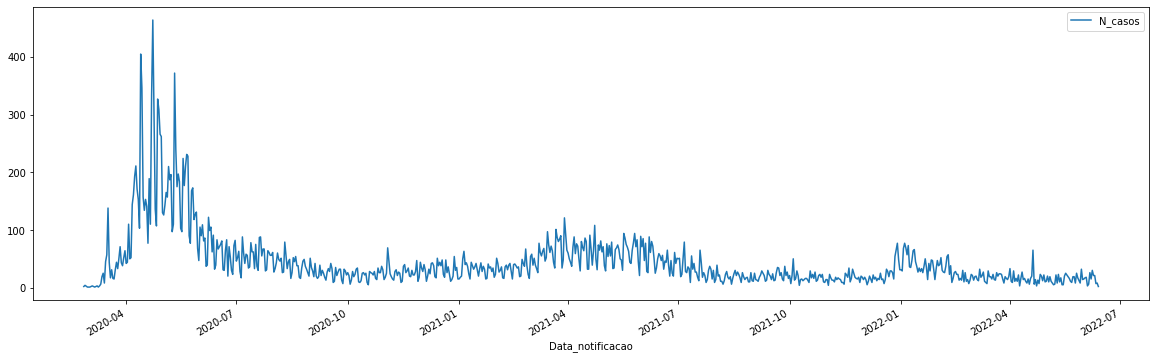

In [11]:
df_st.plot(figsize=(20,6))

Percebe uma grande diminuição no numero de casos a partir de 08/20, percebe que tem 3 picos que seram confirmados com a média movel!! 

Deve cruzar essa informação com eventos sociais (festividades, quarentena e outros) e com a aplcação de vacina. Quando a vacina teve um grande aumento no seu número de vacinados?? 

<AxesSubplot:ylabel='Frequency'>

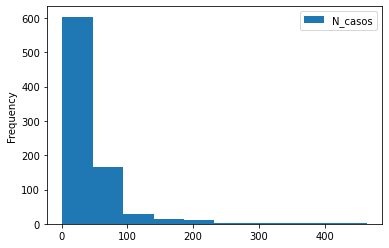

In [43]:
df_st.plot.hist()

A série não apresenta destribuição simétrica ou próximo a normal!

Deve diferenciar ??

## Diferenciando a série

### DIferenciação de primeira ordem

In [45]:
df_dif = df_st.diff(1)


<AxesSubplot:xlabel='Data_notificacao'>

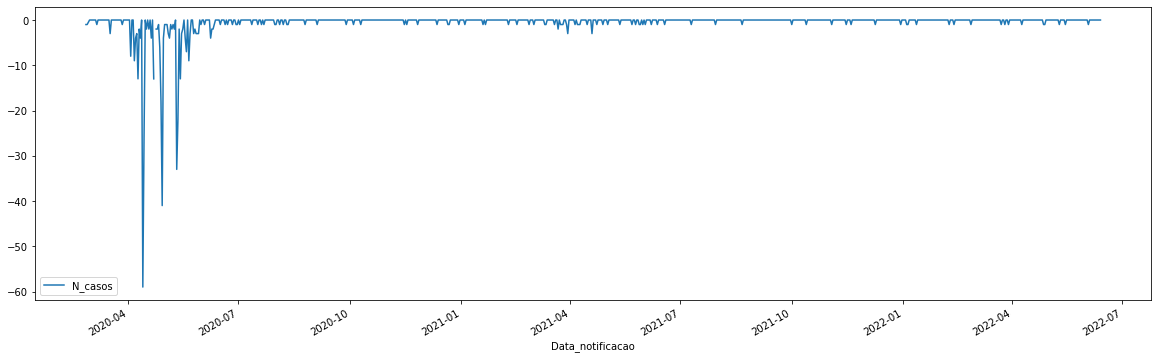

In [47]:
df_dif.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

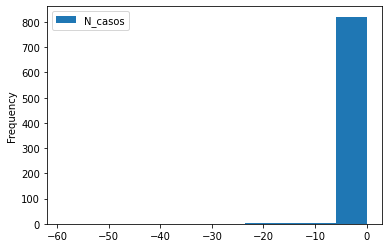

In [46]:
df_dif.plot.hist()

### Diferenciação de segunda ordem

In [48]:
df_dif2 = df_st.diff(2)

<AxesSubplot:xlabel='Data_notificacao'>

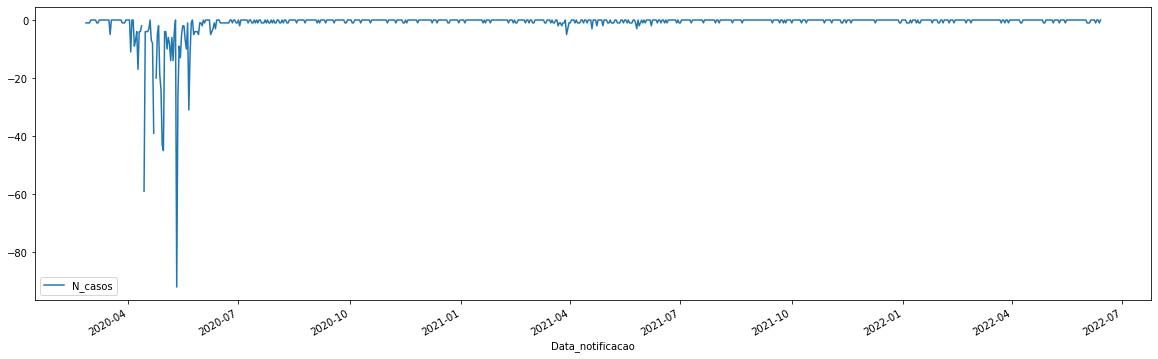

In [49]:
df_dif2.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

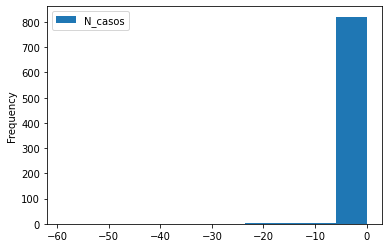

In [50]:
df_dif.plot.hist()

Como proceder quando é necessário muitas diferenciações ??

## Decomposição da série temporal

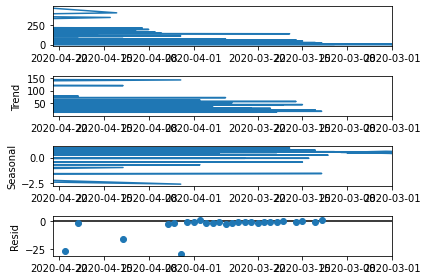

In [36]:
df_decomp = tsa.seasonal_decompose(df_st, period = 90)
df_decomp.plot();

DUVIDA!!!

## Análise da média movel

Média movel para 30 dias

<AxesSubplot:xlabel='Data_notificacao'>

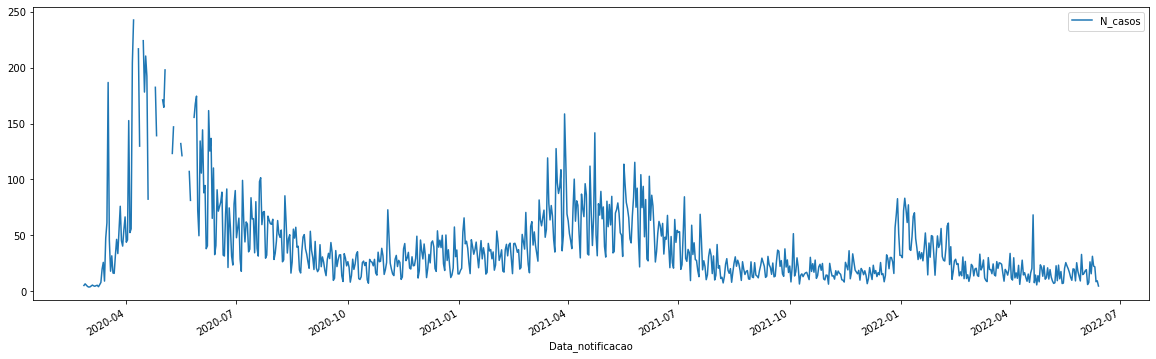

In [35]:
df_st.rolling(30).mean().plot(figsize=(20,6))

consegue perceber que tem 3 ondas

#### Média movel para 90 dias

<AxesSubplot:xlabel='Data_notificacao'>

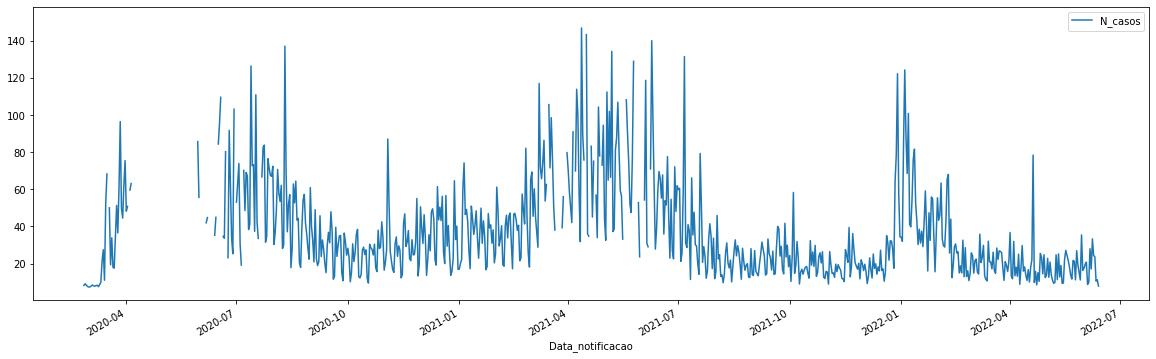

In [42]:
df_st.rolling(90).mean().plot(figsize=(20,6))

As 3 grandes ondas tem aproximadamente o mesmo tamanho e mesma duração, o gráfico indica uma sazonalidade! O número de casos é bem mais baixo que a primeira onda mas é grande com relação a média do periodo 

## Autocorrelção

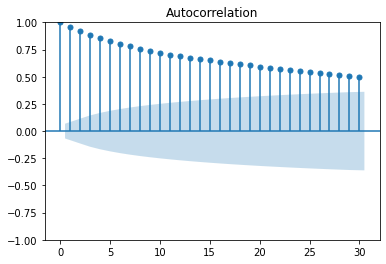

In [37]:
plot_acf(df_st);

A série apresenta um autocorrelação (correlação com ela mesma) significativa de 30 lags.

## Autocorrelação Parcial

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


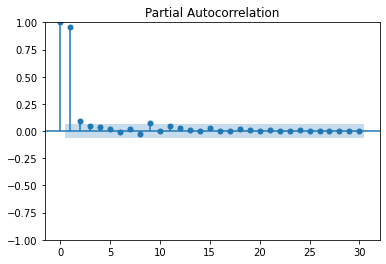

In [40]:
plot_pacf(df_st);

A autocorrelação parcial é feita para verificar a correlação dela com ela mesma sem influência dos lags próximos, o número de lags significativos foi 4